In [18]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import os
import joblib
dataset_path = 'mnist_784.pkl'

# Function to fetch and save the dataset
def fetch_and_cache_mnist(dataset_path):
    if os.path.exists(dataset_path):
        # Load the dataset from the file
        mnist = joblib.load(dataset_path)
        print("Loaded dataset from cache.")
    else:
        # Fetch the dataset from the server
        mnist = fetch_openml('mnist_784', version=1, as_frame=False)
        # Save the dataset to the file
        joblib.dump(mnist, dataset_path)
        print("Fetched and cached the dataset.")
    return mnist

# Fetch and cache the dataset
mnist = fetch_and_cache_mnist(dataset_path)

# Use the dataset
X, y = mnist.data, mnist.target
from sklearn.utils import resample
X_sample, y_sample = resample(X, y, n_samples=2000, random_state=42, stratify=y)

Loaded dataset from cache.


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

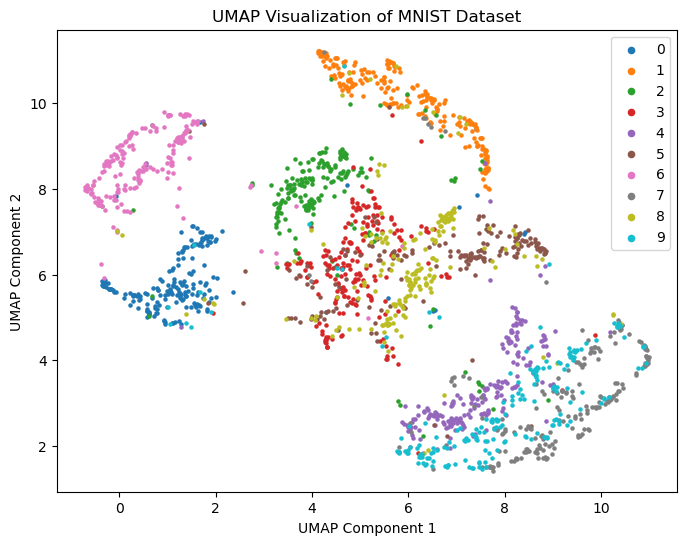

In [20]:
plt.figure(figsize=(8, 6))
colors = plt.get_cmap('tab10')
for class_value in np.unique(y_sample):
    indices = np.where(y_sample == class_value)
    plt.scatter(X_umap[indices, 0], X_umap[indices, 1], label=str(class_value), s=5)
plt.title('UMAP Visualization of MNIST Dataset')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(markerscale=2)
plt.show()


In [21]:
X_umap.shape

(2000, 2)